In [1]:
# %% imports
# libraries
import torch
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# local imports
import Fast_MRI_dataloader
# import autoencoder_template
from matplotlib import pyplot as plt
from Fast_MRI_dataloader import create_dataloaders

In [2]:
### prepare the datasets
# get dataloader
# define parameters
data_loc = os.getcwd()
print(data_loc)
data_loc = data_loc + '\Fast_MRI_Knee'
batch_size = 64
train_loader, test_loader = create_dataloaders(data_loc, batch_size)

c:\Users\Jexel\Documents\Yexel Files Documents\TUE Complete\WTB\Jaar 2 AIESW\Kwartiel 4\5LSL0 Machine learning for signal processing\Assignment\5LSL0-1\Assignment 4


# Week 2

### Exercise 3 - MRI helper functions

#### (a) [2pt]Create a Python function that, given an MRI image, calculates the K-space.
Make sure to only use PyTorch functions and that the function can work on multiple
images in parallel. Visualize a ground truth image with its accompanying full k-space
measurement.
hint: make sure that the DC (i.e., 0 Hz component) is at the center of the image.
Moreover, plotting the log of the absolute value of the k-space provides better contrast.

In [3]:
# iter(train_loader)
# get some examples
examples = enumerate(test_loader)
 # go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    # M = measurement Mask
    # k-space = FFT(img)
    # gt = X = groundtruth
    continue

# _, (x_clean_example, x_noisy_example, labels_example) = next(examples)

100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


In [4]:
# atorch.fft.fft2(inpu
def K_space(X):
    ''' Return the K-space of an input image:
        Arguments:
        ---------------------
        X: torch.Tensor (default: -)

        Returns:
        ---------------------------
        KS: torch.Tensor
    '''
    # KS = torch.log(torch.abs(torch.fft.fftshift(torch.fft.fft2(gt)))) 
    KS = torch.fft.fftshift(torch.fft.fft2(gt))
    return KS

In [5]:
x1 =K_space(gt)

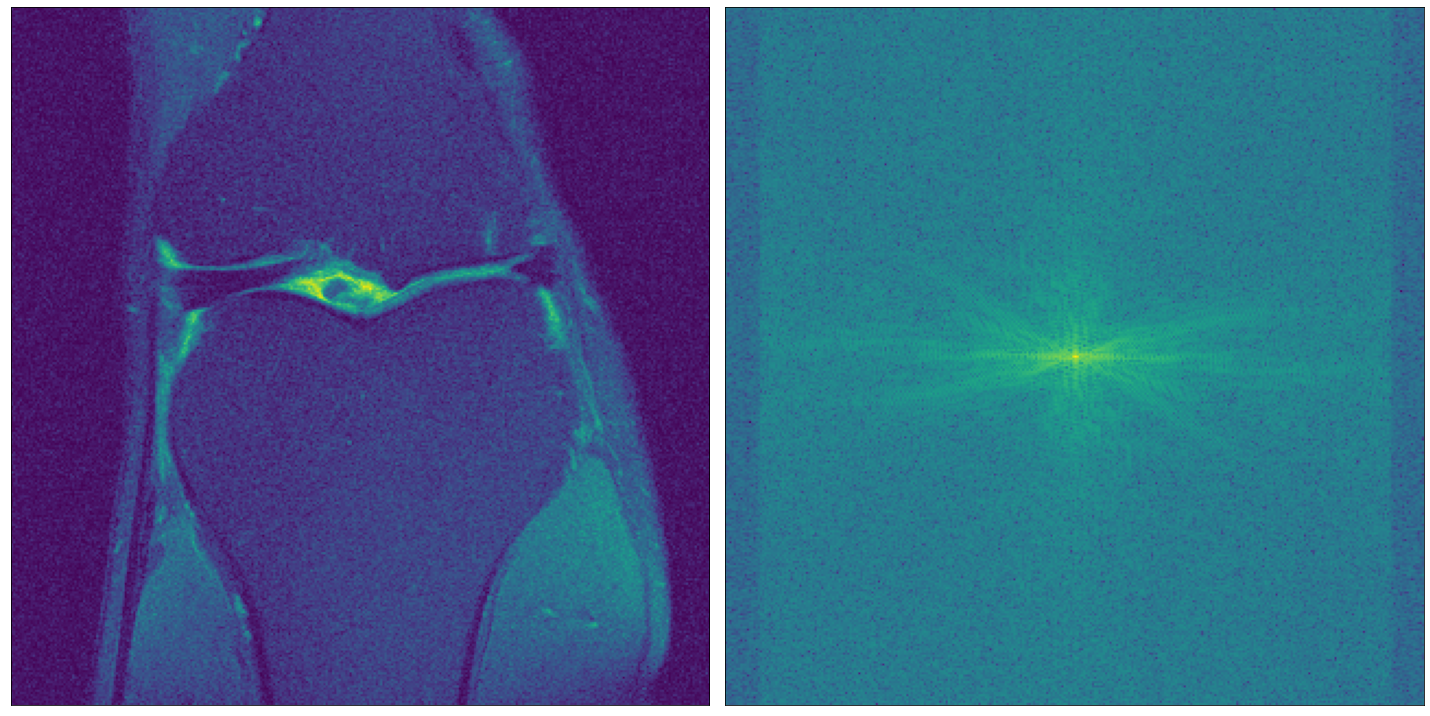

In [6]:
# kp,m,gt = next(iter(test_loader))
# gt_kspace = kspace(gt)
# gt_kspace_plt = torch.log(torch.abs(gt_kspace))
x1 =K_space(gt)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gt[1,:,:])
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(torch.log(torch.abs(x1[1,:,:])))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

#### (b) [1pt]Create a Python function that, given a full k-space and measurement matrix, calculates the partial k-space.

In [7]:
a = torch.randn(2,2)
b = torch.randn(2,2)
print(a)
print(b)

tensor([[ 1.3193,  0.3476],
        [-0.7206, -2.3583]])
tensor([[-0.3814,  0.3601],
        [ 1.2821,  0.3171]])


In [8]:
print(a * b) # element wise
print(torch.matmul(a,b)) # matrix wise (row*column)

tensor([[-0.5032,  0.1252],
        [-0.9239, -0.7478]])
tensor([[-0.0576,  0.5853],
        [-2.7487, -1.0072]])


In [9]:
def partial_K_space(X,Mask):
    '''
    Given a full-K-space image, return a partial K-space image based on the measurement mask

    Arguments:
    X: torch.tensor() (default: -)
        Full K-space image
    Mask: torch.tensor() (default: -)
        Measurement mask (consisting of only 1's & 0's)
    
    return
    ---------
    part_k_space: torch.tensor()
    '''
    PKS = X*Mask
    return PKS

#### (c) [2pt]Create a Python function that, given a partial k-space, calculates the accelerated measurement image. Visualize a partial k-space with its accompanying accelerated MRI.

In [10]:
def acc_img(X):
    '''
    Given the partial k_space image X, calculate the accelerated measurement image:

    Arguments:
    ----------------
    X: torch.tensor()

    returns:
    --------------
    Y: torch.tensor()
    '''
    Y = torch.fft.ifft2(torch.fft.ifftshift(X))
    return Y

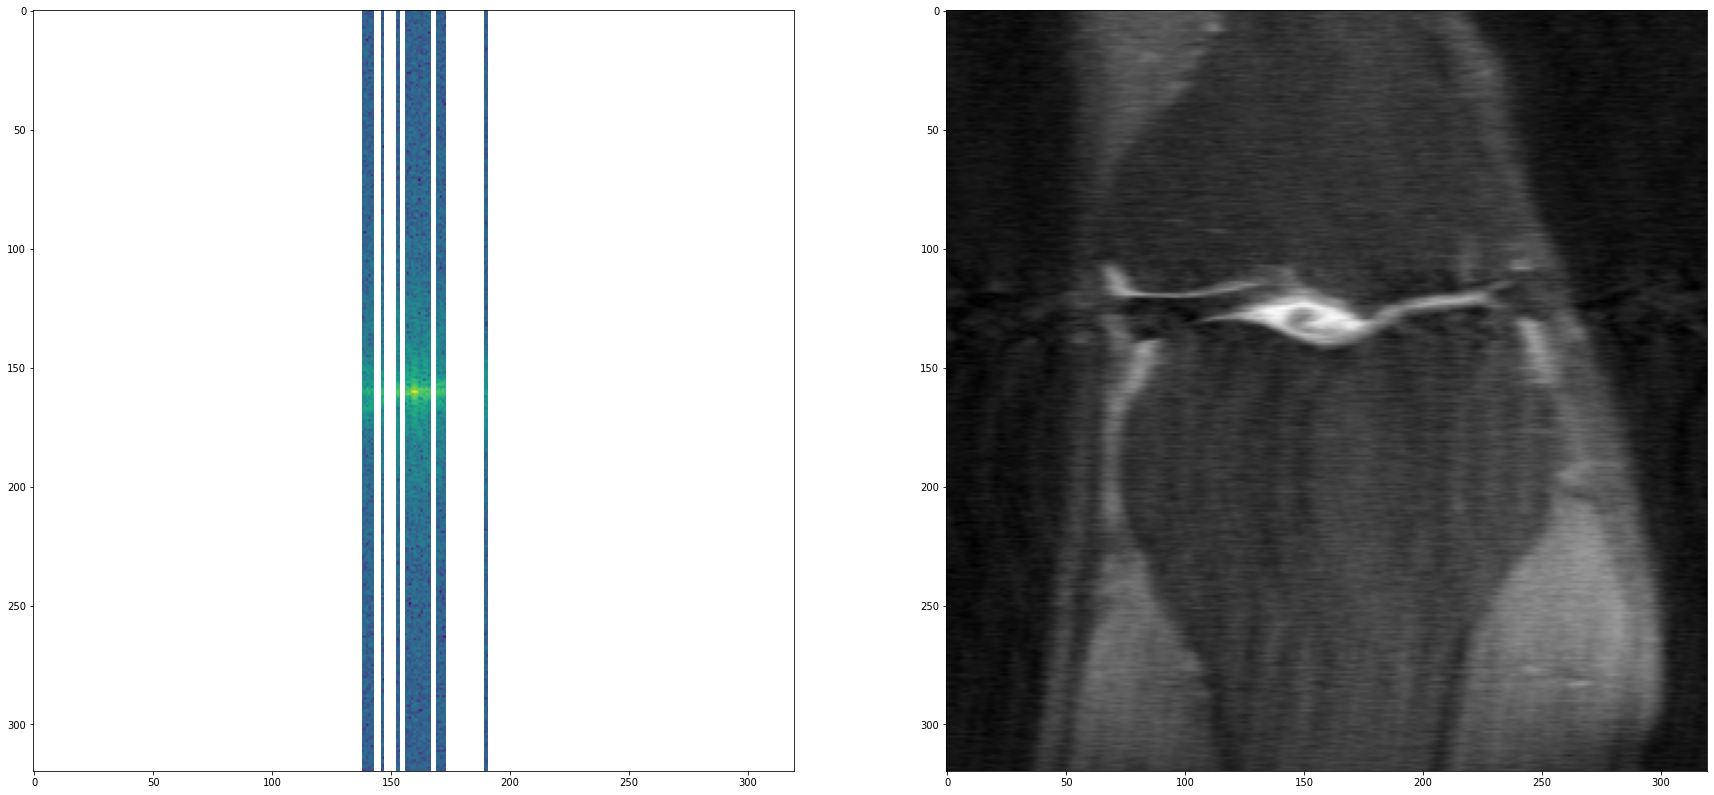

In [11]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x3 = acc_img(x2)
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
plt.imshow(torch.log(torch.abs(x2[1,:,:])))

plt.subplot(1,2,2)
plt.imshow(torch.abs(x3[1,:,:]), cmap='gray')

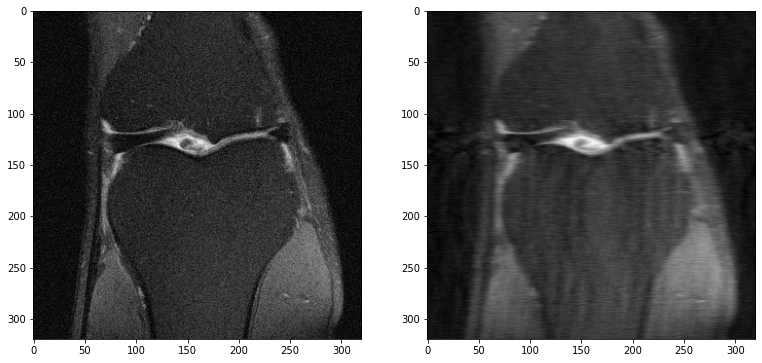

In [12]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x4 = acc_img(x2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(gt[1,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(torch.abs(x3[1,:,:]),cmap='gray')

# plt.xticks([])
# plt.yticks([])

#### (d) [1pt] Recreate the pipeline image shown above for a different MRI image.
hint: for the best result, use the same ’vmin’ and ’vmax’ for the full and partial k-space
images.

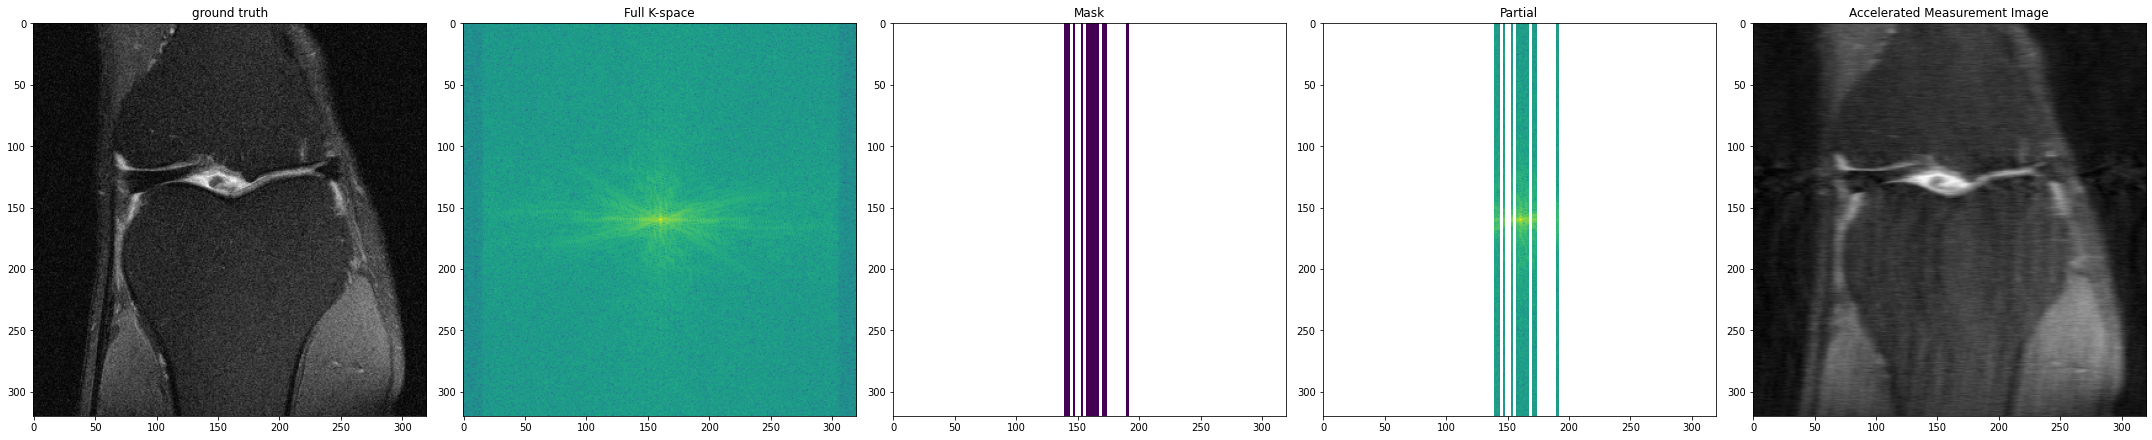

In [13]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x3 = acc_img(x2)
### vmin and vman
vmin = torch.min(torch.log(torch.abs(x1)))
vmax = torch.max(torch.log(torch.abs(x1)))

plt.figure(figsize=(30,50))

plt.subplot(1,5,1)
plt.imshow(gt[1,:,:],cmap='gray')
plt.title('ground truth')

plt.subplot(1,5,2)
plt.imshow(torch.log(torch.abs(x1[1,:,:])), vmin=vmin,vmax=vmax)
plt.title('Full K-space')

plt.subplot(1,5,3)
plt.imshow(torch.log(torch.abs(M[1,:,:])))
plt.title('Mask')

plt.subplot(1,5,4)
plt.imshow(torch.log(torch.abs(x2[1,:,:])),  vmin=vmin,vmax=vmax)
plt.title('Partial')

plt.subplot(1,5,5)
plt.imshow(torch.abs(x3[1,:,:]),cmap='gray')
plt.title('Accelerated Measurement Image')
plt.tight_layout()


#### (e) [1pt] In the accelerated MRI image it looks as though the same image is overlayed several times, what is this effect called, and why does it only happen in the horizontal direction?

### Exercise 4 - ISTA for MRI

#### (a) [1pt] Central to ISTA is the data consistency step: ((I−μAT A)x+μAy), where y is the measurement, x the current guess, and A the measurement matrix. 
Write down what this data consistency step should look like for accelerated MRI, given measurement Y and sampling mask M.

#### (b) [3 pt]Create a Python function that implements ISTA for accelerated MRI. 
Make sure the function takes as inputs: step size μ, shrinkage parameter λ, number of iteration
K, a batch of k-space measurements and the accompanying batch of measurement
masks M. It should output the final batch of reconstructions xK 

In [ ]:
examples = enumerate(test_loader)
 # go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    # M = measurement Mask
    # k-space = FFT(img)
    # gt = X = groundtruth
    continue
# print(M)
print('------------')
print(kspace)
print('------------')
print(gt)

In [112]:
# %% ISTA
def softthreshold_exc4(x,shrinkage):
    '''
    Implement soft threshold:
    F(x) = sign(x) * max(|x|)-lambda, 0_
    Arguments:
    ----------------------
    x: data-set (default: train_dataset)??
    shrinkage: float (default: --)
    '''
    p1 = torch.sgn(x)
    p2 = torch.max(torch.abs(x)-shrinkage, torch.zeros_like(torch.abs(x)))
    new = p1*p2
    return new

In [ ]:
# # sanity Check
# y = torch.fft.ifft2((torch.fft.ifftshift(kspace))) #conver complex fourier -> complex image domain
# z= abs(y)
# zz= (z<0)
# print(torch.sgn(y))
# # print(torch.sum(zz))


In [150]:
def ISTA_MRI(mu,shrinkage,K,kspace,mask):
    '''
    Iterative shrinkage and Thresholding Algorithm

    Arguments:
    --------------------
    mu:     float (default: 0.5)
        The stepsize
    shrinkage:  float (default: 0.5)
        The shrinking paramter 
    K: int (default: 10)
        The number of unfolding iterations
    Kspace: torch.tensor().type=float.complex (default: ???)
        The ground truth partial k-space image 
    Mask: torch.tensor()
        The mask

    Returns:
    --------------------
    x: torch.tensor().type=float.complex
        The ISTA for accelerated MSI image in fourier-domain
    '''
    ########################
    # Use the picture on phone to develop
    # step1: y == Fourier (gt)
    # step2: xk = mask*Fourier(gt)
    # step3: xk_2 = mu * mask * Fourier(gt)
    # step4 : xk_approx =  xk - xk_2 + mu*y
    # step5 : x_k = soft_treshold(xk_approx)
    # step 5.5 repeat until error is minimum

    #Note step 4 and step 5 could be wrong order.
    # step6: x_k_output = inv_Fourier ( xk_approx) 



    ########################

    y = kspace # ground truth partial k-space
    Mask = mask
    ##### Params:
    mu = mu
    lamda = shrinkage

    err = []

    # iteration
    x_in = torch.zeros_like(y) # complex zeros
    for i in range(K):
        
        x_k = mu*x_in + mu*Mask*(y-Mask*x_in) # M*(X_gt - mu*Mask*(Mask*X_in))
        x_k_soft  = softthreshold_exc4(x_k, lamda)
        err.append(torch.nn.functional.mse_loss(torch.abs(x_k_soft), torch.abs(x_in)).item())
        if err[i] < 1e-20:
            x_in = x_k_soft
            break
        else:
            x_in = x_k_soft
        

    # print(err[i],i)
    return x_in, err, i 

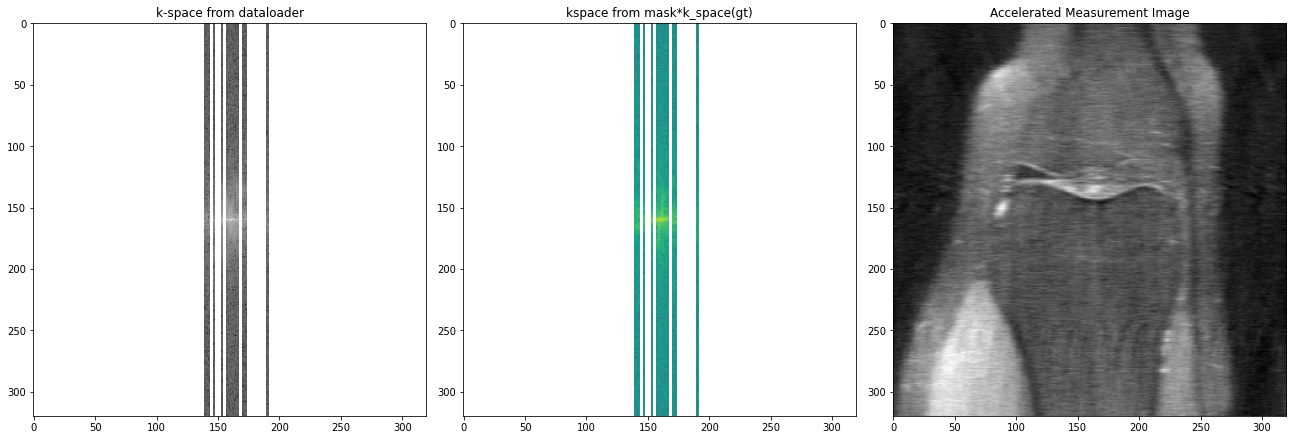

In [ ]:
    # make an identity matrix
    A = torch.eye(len(y_flat))  
    x_in = torch.zeros_like(y_flat)

    x_k_0 = torch.matmul(y_flat,(A.T)) # --> soft-treshold ---> I-mu*A.T*A
    #x_k = [mu*A.T*y + [x_in*I - mu*A*A.T*x_in]]
    # x_k = mu*x_k_0 + (x_in@A-mu*x_in@A.T@A)
    err = 1
    while err > 1e-7:
        for i in range (K):
            x_k = mu*x_k_0 + (x_in@A-mu*x_in@A.T@A)
            x_k_soft = softthreshold(x_k,lamda)
            err = torch.nn.functional.mse_loss(x_k_soft,x_in).item()
            x_in = x_k_soft
            # print(err)
    
    z = x_in.reshape(y.shape)
    return z

#### (c) [2 pt] Use your ISTA algorithm on 5 images from the test set. 
Show them in a figure consisting of 5 collumns (1 per image) and 3 rows. Row 1 should contain the initial
reconstruction from partial k-space, row 2 the reconstruction after ISTA, and row 3
the actual ground truth target. You will have to play with the values for μ, λ, and K.
Explain what you see.)

In [ ]:
examples = enumerate(test_loader)
 # go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    # M = measurement Mask
    # k-space = FFT(img)
    # gt = X = groundtruth
    continue
# print(M)
print('------------')
print(kspace)
print('------------')
print(gt)

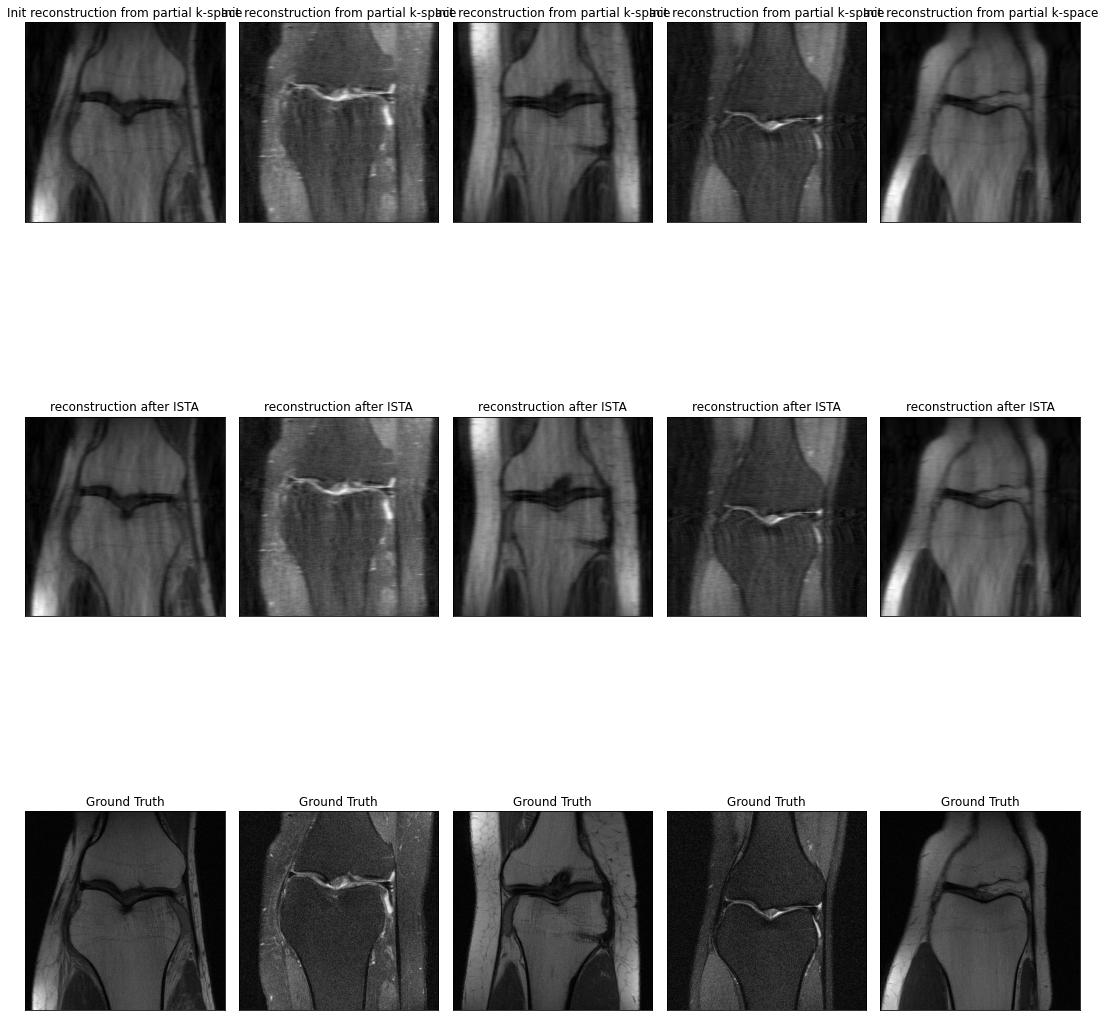

In [157]:
mu = 0.5
lambd = 0.5
k = 1000


kspace,Mask,gt = next(iter(test_loader))
# (mu,shrinkage,K,kspace,mask)
plt.figure(figsize=(15,20))
for i in range(5):

    rec_init_kp =acc_img(kspace[i,:,:]) # init recon from k-space
    rec_ISTA_MRI,_,_ = ISTA_MRI(mu,lambd,k,kspace[i,:,:],Mask[i,:,:]) # recon mri_ista
    gt_MRI = gt[i,:,:]

    

    plt.subplot(3,5,i+1)
    plt.imshow(torch.abs(rec_init_kp),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("Init reconstruction from partial k-space")
    
    plt.subplot(3,5,i+6)
    plt.imshow(torch.abs(acc_img(rec_ISTA_MRI)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("reconstruction after ISTA")
    
    plt.subplot(3,5,i+11)
    plt.imshow(torch.abs(gt_MRI),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title("Ground Truth")

    plt.tight_layout()

#### (d) [1 pt] To get a numerical estimate for the performance of ISTA, run it on the entire test set and report the resulting mean squared error (mse).

In [167]:
from tqdm import tqdm
import torch.nn.functional as F

mu = 0.5
lamda = 0.5
k = 1000

MSE_loss_val = []
for i,(kspace,Mask,gt) in enumerate(tqdm(test_loader)):
    rec_ISTA_MRI,_,_ = ISTA_MRI(mu,lambd,k,kspace,Mask)
    gt_IST_MRI  = torch.abs(acc_img(rec_ISTA_MRI))
    MSE_loss_val.append(F.mse_loss(gt,gt_IST_MRI).item())

100%|██████████| 4/4 [17:19<00:00, 259.93s/it]


In [173]:
# MSE LOSS!
print(np.array(MSE_loss_val))
print(np.mean(np.array(MSE_loss_val)))


[0.1561455  0.15492293 0.16125105 0.16183697]
0.15853911265730858
